In [1]:
from analysis.stock_52_weeks import *
from plot_chart import *
from analysis.technical_indicator import *
from analysis.top_20_stocks import *
from krx_wr_script import *
from analysis.bot_strategy import *
from datetime import datetime, timedelta, date
from util import *
import pandas as pd
from pykrx import stock
import matplotlib.pyplot as plt
from finta import TA
import yfinance as yf
import matplotlib.pyplot as plt
from glob import glob
util_m = util()


In [2]:
ROOT = './Krx_Chart_folder'
stocks = [x.split('/')[-1] for x in glob(f"{ROOT}/*")]
len(stocks)

2414

In [3]:
util_m.stock_name = '카카오'
stock_csv = pykrx_read_csv(stock_name = util_m.stock_name, 
                           Krx_Char_folder_path = './Krx_Chart_folder')

stock_csv

,date,open,high,low,close,volume
0,2019-01-02,20774,21075,20372,20473,173462
1,2019-01-03,20573,21175,20172,20573,293989
2,2019-01-04,20473,20874,20372,20774,251728
3,2019-01-07,21073,21474,20472,20673,378153
4,2019-01-08,20571,20671,19970,20051,450462
...,...,...,...,...,...,...
604,2021-06-14,136000,143000,136000,142500,6240394
605,2021-06-15,143500,144500,140500,144500,4950329
606,2021-06-16,144000,146000,142500,143000,4996272
607,2021-06-17,142000,149500,140500,148000,5408889


In [5]:
recent_high = stock_csv['high'].values.max()
stock_csv[stock_csv['high']==recent_high]

,date,open,high,low,close,volume
608,2021-06-18,150000,157500,149500,155000,7643972


In [24]:
# high before 20200101
stock_csv_20200101 = stock_csv[stock_csv['date'] < date(2020, 1, 1).strftime("%Y-%m-%d")]

In [25]:
stock_csv_20200101.set_index('date', drop=True, inplace=True)
stock_csv_20200101.index.values

array(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
       '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
       '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
       '2019-01-18', '2019-01-21', '2019-01-22', '2019-01-23',
       '2019-01-24', '2019-01-25', '2019-01-28', '2019-01-29',
       '2019-01-30', '2019-01-31', '2019-02-01', '2019-02-07',
       '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-18', '2019-02-19',
       '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-25',
       '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-04',
       '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
       '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14',
       '2019-03-15', '2019-03-18', '2019-03-19', '2019-03-20',
       '2019-03-21', '2019-03-22', '2019-03-25', '2019-03-26',
       '2019-03-27', '2019-03-28', '2019-03-29', '2019-04-01',
       '2019-04-02', '2019-04-03', '2019-04-04', '2019-

* The high between 2019-01-02 ~ 2019-12-30
>>> 31,913 KRW at ['2019-11-20' '2019-11-29']


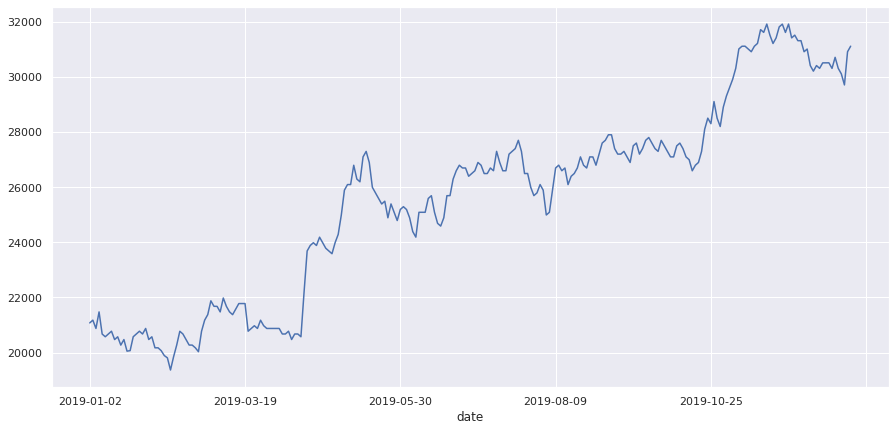

In [36]:
plt.rcParams['figure.figsize']=(15,7)
stock_csv_20200101['high'].plot()
print(f"* The high between {stock_csv_20200101.index[0]} ~ {stock_csv_20200101.index[-1]}")
print(f">>> {stock_csv_20200101['high'].values.max():,} KRW at {stock_csv_20200101[stock_csv_20200101['high']==stock_csv_20200101['high'].values.max()].index.values}")